## K-Means Clustering untuk dataset Mall_Customers

### Import Libraries dan Load Data

In [16]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('data/Mall_Customers.csv') # baca dataset

df.head() # tampilkan 5 teratas

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Seleksi Fitur

In [17]:
fitur = df.iloc[:, 3:5] # memilih kolom annual income dan spending score sebagai fitur
fitur.head() # tampilkan isi fitur

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Standarisasi Data

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(fitur)

### Elbow Method

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

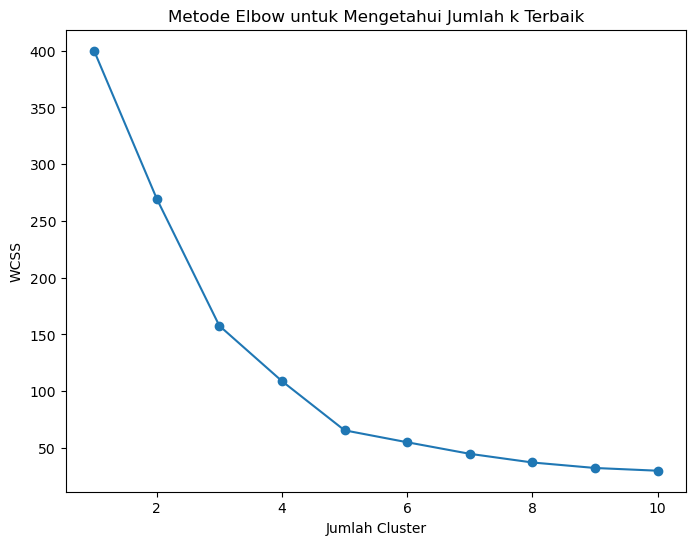

In [19]:
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Membuat plot elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Mengetahui Jumlah k Terbaik')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

### Pemodelan

In [23]:
# Membuat model K-Means dengan jumlah cluster yang telah ditentukan
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the original data
df['Cluster'] = cluster_labels
df.head(10)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
5,6,Female,22,17,76,2
6,7,Female,35,18,6,4
7,8,Female,23,18,94,2
8,9,Male,64,19,3,4
9,10,Female,30,19,72,2


### Visualisasi Kluster

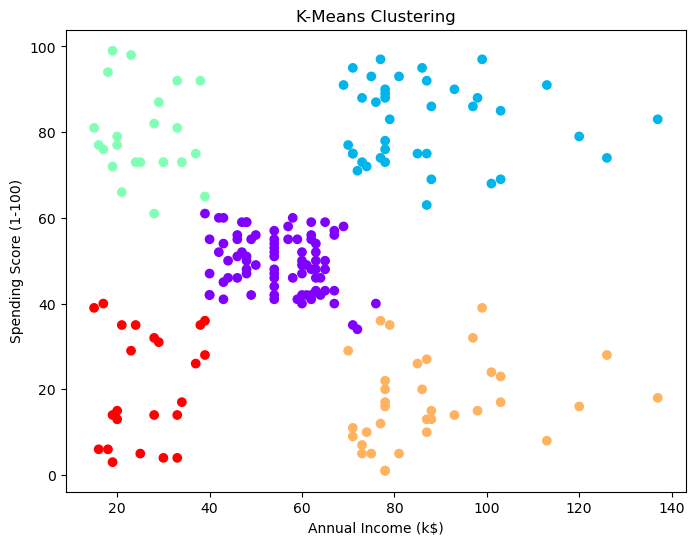

In [24]:
plt.figure(figsize=(8, 6))

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=cluster_labels, cmap='rainbow')

plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

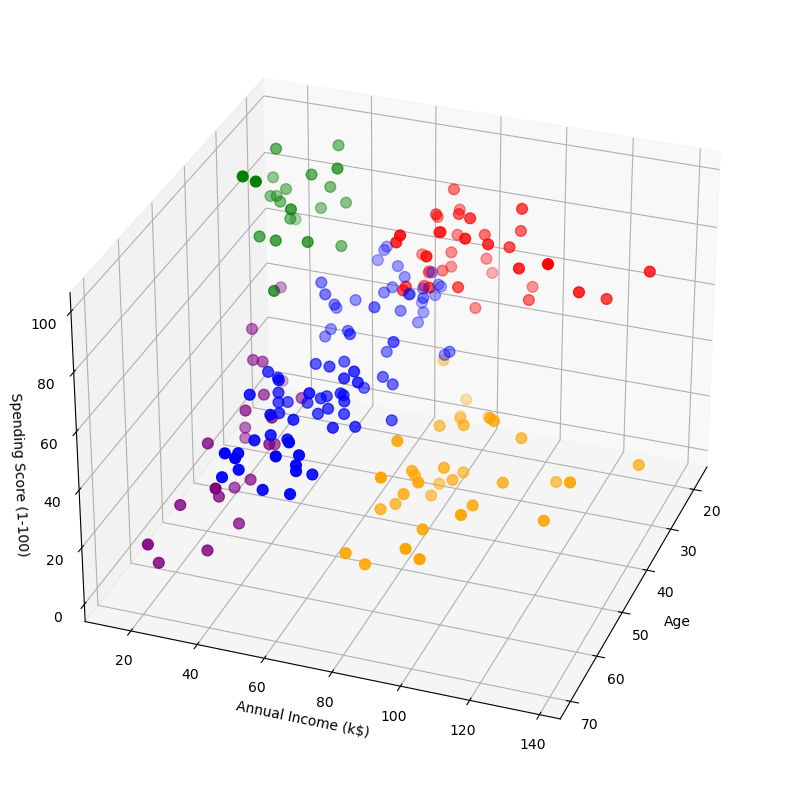

In [25]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income (k$)"][df.Cluster == 0], df["Spending Score (1-100)"][df.Cluster == 0], c='blue', s=60)
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income (k$)"][df.Cluster == 1], df["Spending Score (1-100)"][df.Cluster == 1], c='red', s=60)
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income (k$)"][df.Cluster == 2], df["Spending Score (1-100)"][df.Cluster == 2], c='green', s=60)
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income (k$)"][df.Cluster == 3], df["Spending Score (1-100)"][df.Cluster == 3], c='orange', s=60)
ax.scatter(df.Age[df.Cluster == 4], df["Annual Income (k$)"][df.Cluster == 4], df["Spending Score (1-100)"][df.Cluster == 4], c='purple', s=60)
ax.view_init(elev=30, azim=20)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

## Segmentasi Citra dengan SOM

### Import libraries dan load image

In [26]:
import cv2 as cv
import numpy as np
from minisom import MiniSom
from PIL import Image

image_path = "data/kucing.jpg"
img = Image.open(image_path)

### Reshape data image

In [27]:
img_data = np.asarray(img)
img_data = img_data / 255.0  # Normalize pixel values to [0, 1]
flat_img_data = img_data.reshape(-1, 3)

### Implementasi SOM

In [28]:
som_dim = 10  
som = MiniSom(som_dim, som_dim, 3, sigma=0.3, learning_rate=0.5)

som.train_random(flat_img_data, 100)
segmented_img = np.zeros_like(flat_img_data)

In [29]:
for i, x in enumerate(flat_img_data):
    winner = som.winner(x)
    weights = som.get_weights()[winner[0], winner[1]]
    segmented_img[i] = weights

In [30]:
segmented_img = segmented_img.reshape(img_data.shape)

### Visualisasi Image

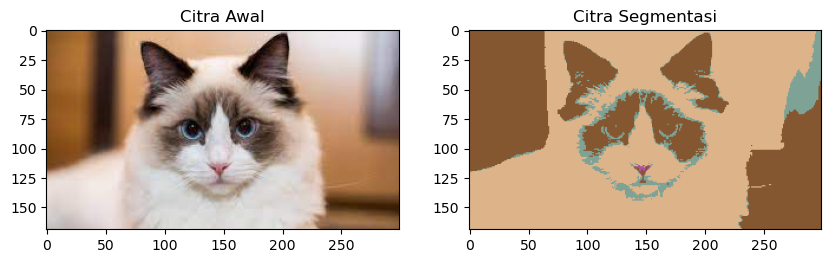

In [31]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Citra Awal")
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title("Citra Segmentasi")
plt.show()